In [1]:
import torch
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

> 단순회귀(random)

In [2]:
a=torch.linspace(-1, 1, 10)
print(a)
print(a.shape)

tensor([-1.0000, -0.7778, -0.5556, -0.3333, -0.1111,  0.1111,  0.3333,  0.5556,
         0.7778,  1.0000])
torch.Size([10])


In [3]:
# size가 1인 dimension 추가
# dim=추가할인덱스, (0, 추가할 인덱스)
b=torch.unsqueeze(torch.linspace(-1, 1, 10), dim=1)
print(b)
print(b.shape)

tensor([[-1.0000],
        [-0.7778],
        [-0.5556],
        [-0.3333],
        [-0.1111],
        [ 0.1111],
        [ 0.3333],
        [ 0.5556],
        [ 0.7778],
        [ 1.0000]])
torch.Size([10, 1])


In [4]:
# size가 1인 dimension 제거
# dim=추가할인덱스, (0, 추가할 인덱스)
print(b.shape)
print(torch.squeeze(b))
print(torch.squeeze(b).shape)

torch.Size([10, 1])
tensor([-1.0000, -0.7778, -0.5556, -0.3333, -0.1111,  0.1111,  0.3333,  0.5556,
         0.7778,  1.0000])
torch.Size([10])


torch.Size([100, 1])
torch.Size([100, 1])


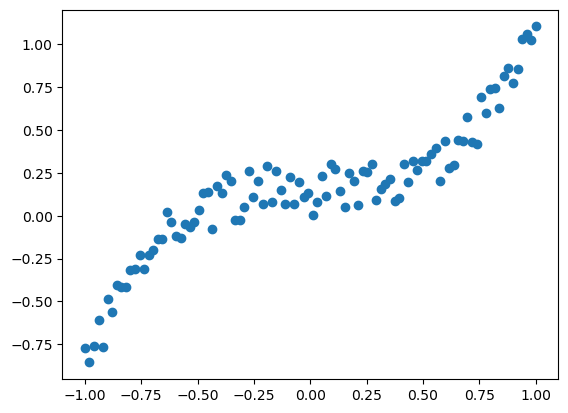

In [5]:
import random
from matplotlib import pyplot as plt
random.seed(1)
torch.manual_seed(1)
X = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1).to(device)
y = X.pow(3) + 0.3 * torch.rand(X.size()).to(device)
print(X.shape)
print(y.shape)
plt.scatter(X.cpu().numpy(), y.cpu().numpy())

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [7]:
from torch import nn

learning_rate = 1e-3

model = nn.Sequential(
nn.Linear(1, 100),
nn.Linear(100, 10),
nn.Linear(10, 1)
)

model.to(device) # Convert to CUDA
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

for t in range(1000):
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    print(f"epoch: {t}, loss: {loss:.3f}")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 0, loss: 0.168
epoch: 1, loss: 0.164
epoch: 2, loss: 0.160
epoch: 3, loss: 0.157
epoch: 4, loss: 0.153
epoch: 5, loss: 0.149
epoch: 6, loss: 0.146
epoch: 7, loss: 0.143
epoch: 8, loss: 0.139
epoch: 9, loss: 0.136
epoch: 10, loss: 0.133
epoch: 11, loss: 0.130
epoch: 12, loss: 0.127
epoch: 13, loss: 0.125
epoch: 14, loss: 0.122
epoch: 15, loss: 0.120
epoch: 16, loss: 0.117
epoch: 17, loss: 0.115
epoch: 18, loss: 0.113
epoch: 19, loss: 0.110
epoch: 20, loss: 0.108
epoch: 21, loss: 0.106
epoch: 22, loss: 0.104
epoch: 23, loss: 0.102
epoch: 24, loss: 0.100
epoch: 25, loss: 0.098
epoch: 26, loss: 0.097
epoch: 27, loss: 0.095
epoch: 28, loss: 0.093
epoch: 29, loss: 0.092
epoch: 30, loss: 0.090
epoch: 31, loss: 0.089
epoch: 32, loss: 0.087
epoch: 33, loss: 0.086
epoch: 34, loss: 0.085
epoch: 35, loss: 0.083
epoch: 36, loss: 0.082
epoch: 37, loss: 0.081
epoch: 38, loss: 0.079
epoch: 39, loss: 0.078
epoch: 40, loss: 0.077
epoch: 41, loss: 0.076
epoch: 42, loss: 0.075
epoch: 43, loss: 0.07

In [8]:
learning_rate = 1e-3
n_networks = 9
models = list()
criterion = torch.nn.MSELoss()
for i in range(n_networks):
    model = nn.Sequential(
            nn.Linear(1, 100),
            nn.ReLU() if i % 3 == 0 else nn.Tanh() if i % 3==1
            else nn.Sigmoid(),
            nn.Linear(100, 1)
            )
    model.to(device)
    models.append(model)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    for t in range(1000):
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        print(f"model: {i + 1}, epoch: {t}, loss:{loss.item():.3f}")
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

model: 1, epoch: 0, loss:0.196
model: 1, epoch: 1, loss:0.178
model: 1, epoch: 2, loss:0.162
model: 1, epoch: 3, loss:0.146
model: 1, epoch: 4, loss:0.132
model: 1, epoch: 5, loss:0.119
model: 1, epoch: 6, loss:0.107
model: 1, epoch: 7, loss:0.096
model: 1, epoch: 8, loss:0.086
model: 1, epoch: 9, loss:0.077
model: 1, epoch: 10, loss:0.069
model: 1, epoch: 11, loss:0.062
model: 1, epoch: 12, loss:0.057
model: 1, epoch: 13, loss:0.052
model: 1, epoch: 14, loss:0.047
model: 1, epoch: 15, loss:0.044
model: 1, epoch: 16, loss:0.041
model: 1, epoch: 17, loss:0.038
model: 1, epoch: 18, loss:0.036
model: 1, epoch: 19, loss:0.035
model: 1, epoch: 20, loss:0.033
model: 1, epoch: 21, loss:0.033
model: 1, epoch: 22, loss:0.032
model: 1, epoch: 23, loss:0.031
model: 1, epoch: 24, loss:0.031
model: 1, epoch: 25, loss:0.031
model: 1, epoch: 26, loss:0.031
model: 1, epoch: 27, loss:0.031
model: 1, epoch: 28, loss:0.031
model: 1, epoch: 29, loss:0.031
model: 1, epoch: 30, loss:0.031
model: 1, epoch: 3

In [9]:
from torch.autograd import Variable
acc=[]
for model in models:
    X_test, y_test = Variable(X_test), Variable(y_test)
    mse = ((torch.pow((model(X_test).data.cpu() - y_test.cpu()), 2)).sum()) / len(y_test.cpu())
    acc.append(mse)
    print(mse)

tensor(0.0049)
tensor(0.0089)
tensor(0.0279)
tensor(0.0046)
tensor(0.0056)
tensor(0.0279)
tensor(0.0046)
tensor(0.0067)
tensor(0.0281)


In [10]:
import numpy as np
model=models[np.argmin(acc)]
print(model)
print(np.argmin(acc))
print(acc[np.argmin(acc)])

Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=1, bias=True)
)
3
tensor(0.0046)


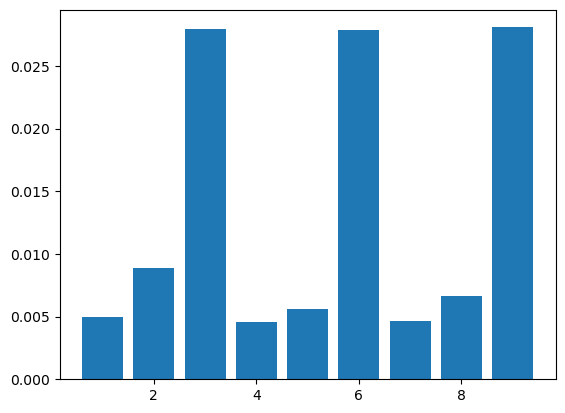

In [11]:
plt.bar(range(1,10),acc)
plt.show()

In [12]:
from torchinfo import summary
summary(model)
summary(model, input_size=(32, 1))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [32, 1]                   --
├─Linear: 1-1                            [32, 100]                 200
├─ReLU: 1-2                              [32, 100]                 --
├─Linear: 1-3                            [32, 1]                   101
Total params: 301
Trainable params: 301
Non-trainable params: 0
Total mult-adds (M): 0.01
Input size (MB): 0.00
Forward/backward pass size (MB): 0.03
Params size (MB): 0.00
Estimated Total Size (MB): 0.03

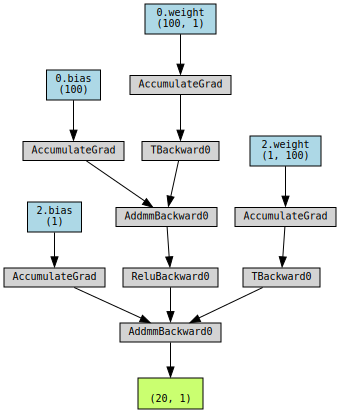

In [14]:
from torchviz import make_dot
pred=model(X_test)
make_dot(pred, params=dict(model.named_parameters()))


(dot.exe:4712): Pango-WARNING **: couldn't load font "Linux libertine Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


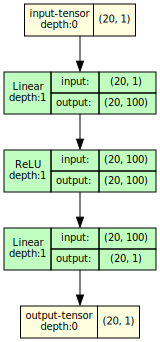

In [16]:
from torchview import draw_graph
model_graph = draw_graph(model, input_data=X_test)
model_graph.visual_graph

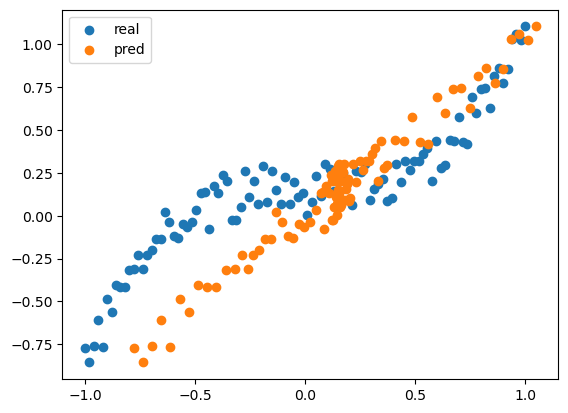

In [17]:
plt.scatter(X.cpu().numpy(), y.cpu().numpy(), label='real')
plt.scatter(model(X).cpu().detach().numpy(), y.cpu().numpy(), label='pred')
plt.legend()
plt.show()

> 단순회귀(csv)

In [18]:
import pandas as pd
df = pd.read_csv('c:/vscode/data/regression/test.csv')
df

,x,y
0,1,1.619379
1,2,1.857290
2,3,2.628194
3,4,2.725426
4,5,3.498926
5,6,3.867042
6,7,4.934539
7,8,4.864829
8,9,5.241539
9,10,5.823689


In [19]:
import torch
X = torch.from_numpy(df['x'].values).unsqueeze(1).float()
y = torch.from_numpy(df['y'].values).unsqueeze(1).float()

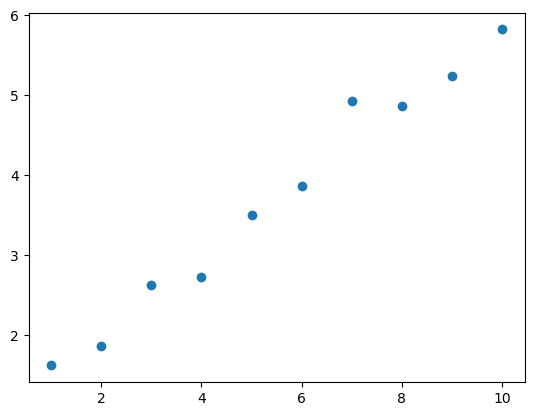

In [20]:
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
plt.scatter(X, y)
plt.show()

In [21]:
from torch import nn
# 단순한 신경망
model = nn.Linear(in_features=1, out_features=1, bias=True)
print(model)
# 초기 파라미터
print(model.weight)
print(model.bias)

Linear(in_features=1, out_features=1, bias=True)
Parameter containing:
tensor([[0.6527]], requires_grad=True)
Parameter containing:
tensor([0.3179], requires_grad=True)


In [22]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)
print(model(X)) # predict(학습 전)

tensor([[0.9706],
        [1.6232],
        [2.2759],
        [2.9286],
        [3.5812],
        [4.2339],
        [4.8865],
        [5.5392],
        [6.1918],
        [6.8445]], grad_fn=<AddmmBackward0>)


In [23]:
for step in range(500):
    prediction = model(X)
    loss = criterion(input=prediction, target=y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"epoch: {step}, loss: {loss:.3f}")

epoch: 0, loss: 0.318
epoch: 1, loss: 0.269
epoch: 2, loss: 0.231
epoch: 3, loss: 0.202
epoch: 4, loss: 0.184
epoch: 5, loss: 0.174
epoch: 6, loss: 0.170
epoch: 7, loss: 0.170
epoch: 8, loss: 0.172
epoch: 9, loss: 0.175
epoch: 10, loss: 0.176
epoch: 11, loss: 0.176
epoch: 12, loss: 0.174
epoch: 13, loss: 0.170
epoch: 14, loss: 0.165
epoch: 15, loss: 0.159
epoch: 16, loss: 0.153
epoch: 17, loss: 0.148
epoch: 18, loss: 0.144
epoch: 19, loss: 0.140
epoch: 20, loss: 0.138
epoch: 21, loss: 0.136
epoch: 22, loss: 0.135
epoch: 23, loss: 0.134
epoch: 24, loss: 0.133
epoch: 25, loss: 0.131
epoch: 26, loss: 0.129
epoch: 27, loss: 0.127
epoch: 28, loss: 0.124
epoch: 29, loss: 0.122
epoch: 30, loss: 0.119
epoch: 31, loss: 0.116
epoch: 32, loss: 0.114
epoch: 33, loss: 0.111
epoch: 34, loss: 0.110
epoch: 35, loss: 0.108
epoch: 36, loss: 0.106
epoch: 37, loss: 0.105
epoch: 38, loss: 0.103
epoch: 39, loss: 0.102
epoch: 40, loss: 0.100
epoch: 41, loss: 0.098
epoch: 42, loss: 0.096
epoch: 43, loss: 0.09

In [24]:
print(model(X)) # predict(학습 후)

tensor([[1.5323],
        [2.0153],
        [2.4984],
        [2.9815],
        [3.4645],
        [3.9476],
        [4.4307],
        [4.9138],
        [5.3968],
        [5.8799]], grad_fn=<AddmmBackward0>)


In [25]:
def mse_loss(preds, trues):
    return torch.sum((preds - trues)**2) / preds.view(-1).shape[0]
mse_loss(model(X), y)

tensor(0.0406, grad_fn=<DivBackward0>)

In [26]:
loss.data.item(), model.weight.data.item(), model.bias.data.item()

(0.04061829298734665, 0.4830736517906189, 1.0491803884506226)

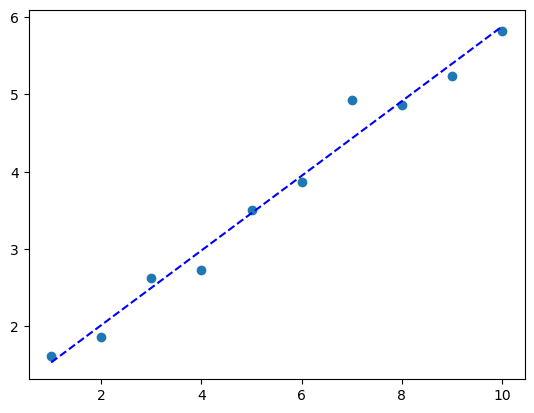

In [27]:
def display_results(model, x, y):
    pred = model(x)
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), pred.data.numpy(), 'b--')
    plt.show()
display_results(model, X, y)

> 다중회귀

In [28]:
import pandas as pd
df = pd.read_csv("c:/vscode/data/ozone/ozone2.csv")
df.head()

,Ozone,Result,Solar.R,Wind,Temp,Month,Day
0,41.00000,0,190.000000,7.4,67,5,1
1,36.00000,0,118.000000,8.0,72,5,2
2,12.00000,0,149.000000,12.6,74,5,3
3,18.00000,0,313.000000,11.5,62,5,4
4,42.12931,1,185.931507,14.3,56,5,5


In [29]:
X = df[['Solar.R', 'Wind', 'Temp']]
y = df[["Ozone"]]

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

import numpy as np
X_train = np.array(X_train_scaled,dtype=np.float32)
y_train = np.array(y_train,dtype=np.float32)
X_test = np.array(X_test_scaled,dtype=np.float32)
y_test = np.array(y_test,dtype=np.float32)

In [31]:
import torch
inputs = torch.from_numpy(X_train)
targets = torch.from_numpy(y_train)

In [32]:
import torch.nn as nn
input_dim = X_train.shape[1]
output_dim = 64
model = nn.Sequential(
    nn.Linear(input_dim,24),
    nn.ReLU(),
    nn.Linear(24,12),
    nn.ReLU(),
    nn.Linear(12,3),
    nn.ReLU(),
    nn.Linear(3,1)
)
print(model)
print(model[6].weight)
print(model[6].bias)    # 학습 전이라서 랜덤값으로 출력됨.

Sequential(
  (0): Linear(in_features=3, out_features=24, bias=True)
  (1): ReLU()
  (2): Linear(in_features=24, out_features=12, bias=True)
  (3): ReLU()
  (4): Linear(in_features=12, out_features=3, bias=True)
  (5): ReLU()
  (6): Linear(in_features=3, out_features=1, bias=True)
)
Parameter containing:
tensor([[-0.5061,  0.4218, -0.2773]], requires_grad=True)
Parameter containing:
tensor([-0.2291], requires_grad=True)


In [33]:
mse = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01) #lr=학습률

loss_list = []
iteration_number = 5000
for iteration in range(iteration_number):
    optimizer.zero_grad()
    results = model(inputs)
    loss = mse(results, targets)
    loss.backward()
    optimizer.step()
    loss_list.append(loss.data)
    if(iteration % 50 == 0):
        print('epoch {}, loss {}'.format(iteration, loss.data))

epoch 0, loss 2827.049560546875
epoch 50, loss 2781.21044921875
epoch 100, loss 2738.5517578125
epoch 150, loss 2696.622802734375
epoch 200, loss 2655.413330078125
epoch 250, loss 2614.912353515625
epoch 300, loss 2575.110595703125
epoch 350, loss 2535.9970703125
epoch 400, loss 2497.561767578125
epoch 450, loss 2459.795654296875
epoch 500, loss 2422.68896484375
epoch 550, loss 2386.232177734375
epoch 600, loss 2350.415771484375
epoch 650, loss 2315.2314453125
epoch 700, loss 2280.669677734375
epoch 750, loss 2246.72314453125
epoch 800, loss 2213.382080078125
epoch 850, loss 2180.638671875
epoch 900, loss 2148.485107421875
epoch 950, loss 2116.913818359375
epoch 1000, loss 2085.91552734375
epoch 1050, loss 2055.484130859375
epoch 1100, loss 2025.611328125
epoch 1150, loss 1996.2901611328125
epoch 1200, loss 1967.5125732421875
epoch 1250, loss 1939.272705078125
epoch 1300, loss 1911.5631103515625
epoch 1350, loss 1884.377197265625
epoch 1400, loss 1857.7071533203125
epoch 1450, loss 183

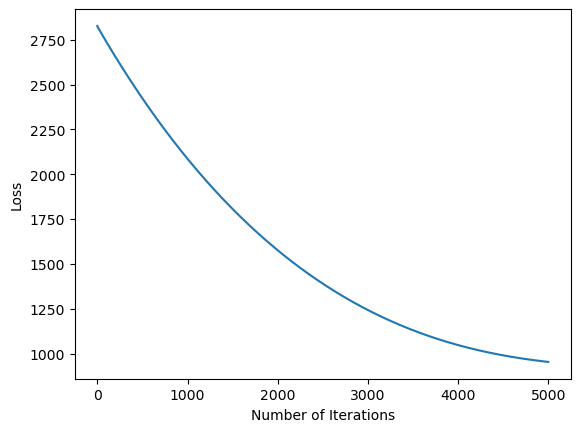

In [34]:
import matplotlib.pyplot as plt
plt.plot(range(iteration_number),loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()

In [35]:
input_x_test = torch.from_numpy(X_test)
predicted = model(input_x_test.float()).data.numpy()
predicted[0:5]

array([[37.402363],
       [37.402363],
       [37.402363],
       [37.402363],
       [37.402363]], dtype=float32)

In [36]:
loss.data.item()

953.1005859375

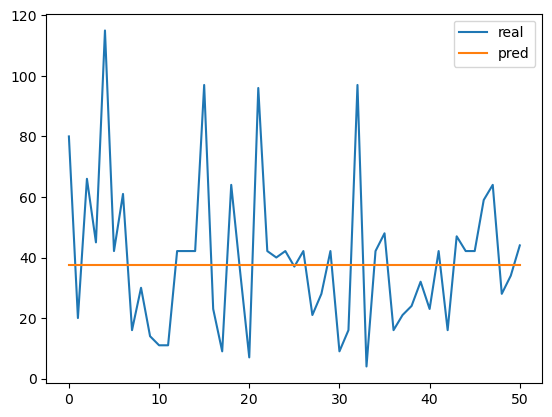

In [37]:
X_test = torch.from_numpy(X_test)
plt.plot(y_test, label='real')
plt.plot(model(X_test).detach().numpy(), label='pred')
plt.legend()
plt.show()